# Student Loan Risk with Deep Learning

In [27]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [28]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [29]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [30]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [31]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
y.head()


0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64

In [32]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns="credit_ranking")

# Review the features DataFrame
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [33]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [34]:
# Create a StandardScaler instance
X_scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler.fit(X_train)


# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [35]:
# Define the the number of inputs (features) to the model
input_nodes = len(X.columns)

# Review the number of features
input_nodes

11

In [36]:

# Define the number of hidden nodes for the first hidden layer
firstlayer = tf.keras.layers.Dense(units=6, activation="relu", input_dim=input_nodes)

# Define the number of hidden nodes for the second hidden layer
secondlayer =  tf.keras.layers.Dense(units=3, activation="relu", input_dim=input_nodes)

# Define the number of neurons in the output layer
Outputlayer = tf.keras.layers.Dense(units=1, activation="sigmoid")


In [37]:
# Create the Sequential model instance
nn_model = tf.keras.models.Sequential()

# Add the first hidden layer
nn_model.add(firstlayer)

# Add the second hidden layer
nn_model.add(secondlayer)

# Add the output layer to the model specifying the number of output neurons and activation function
nn_model.add(Outputlayer)

In [38]:
# Display the Sequential model summary
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [39]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Fit the model using 50 epochs and the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
38/38 [==============================] - 1s 4ms/step - loss: 0.6894 - accuracy: 0.6314
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.6722
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.6939
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.7039
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.6535 - accuracy: 0.7164
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.7281
Epoch 7/50
38/38 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.7415
Epoch 8/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.7423
Epoch 9/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.7389
Epoch 10/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.7389
Epoch 11/50
38/38 [

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


<Axes: >

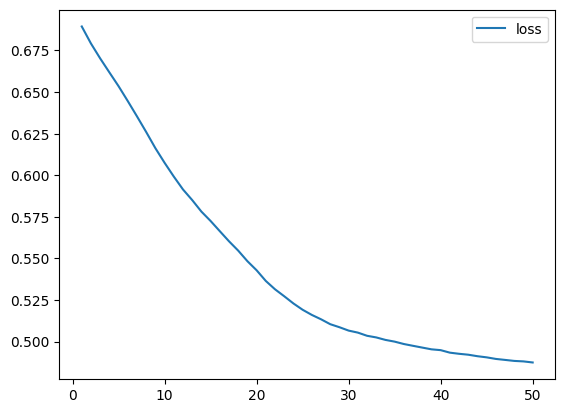

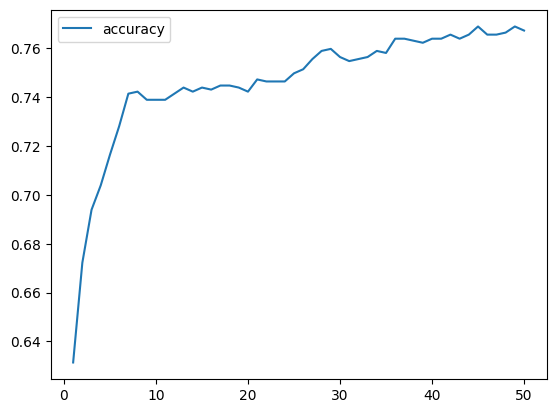

In [41]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
history_df = pd.DataFrame(fit_model.history)

history_df.index += 1
# Display the model loss and accuracy results
history_df.plot(y="loss")

history_df.plot(y="accuracy")

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [42]:
# Set the model's file path
filepath = "student_loans.keras"

# Export your model to a keras file
nn_model.save(filepath)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [43]:
from tensorflow.keras.models import load_model


# Set the model's file path
filepath = "student_loans.keras"

# Load the model to a new object
model = load_model(filepath)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [44]:
# Make predictions with the test data
predictions = nn_model.predict(X_test_scaled,verbose=2)

# Display a sample of the predictions
predictions

13/13 - 0s - 74ms/epoch - 6ms/step


array([[0.525419  ],
       [0.28817096],
       [0.893154  ],
       [0.73041815],
       [0.98797333],
       [0.7299789 ],
       [0.9522787 ],
       [0.11141259],
       [0.83983284],
       [0.32248983],
       [0.9506353 ],
       [0.26360354],
       [0.37822723],
       [0.930381  ],
       [0.49973184],
       [0.36624545],
       [0.832917  ],
       [0.33224857],
       [0.6995872 ],
       [0.37574965],
       [0.5432813 ],
       [0.86176234],
       [0.28857753],
       [0.9150304 ],
       [0.388684  ],
       [0.9629135 ],
       [0.86436677],
       [0.51563424],
       [0.42718914],
       [0.4136793 ],
       [0.65290123],
       [0.9148136 ],
       [0.2650898 ],
       [0.9062278 ],
       [0.14379887],
       [0.5535727 ],
       [0.23515354],
       [0.31868884],
       [0.8941166 ],
       [0.20202863],
       [0.9062021 ],
       [0.13629143],
       [0.10309872],
       [0.944617  ],
       [0.12051219],
       [0.759991  ],
       [0.17544551],
       [0.264

# Save the predictions to a DataFrame and round the predictions to binary results


In [45]:
predictions_df = pd.DataFrame(columns=["predictions"], data=predictions)
predictions_df["predictions"] = round(predictions_df["predictions"],0)
predictions_df

,predictions
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
395,1.0
396,0.0
397,1.0
398,0.0


### Step 4: Display a classification report with the y test data and predictions

In [46]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions_df["predictions"].values))

              precision    recall  f1-score   support

           0       0.70      0.76      0.72       188
           1       0.77      0.71      0.74       212

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


Collecting this data ensures the recommendation system provides personalized and financially responsible loan options.


Personal Information:

Age, marital status, dependents.
Relevant for tailoring loans to individual circumstances.
Educational Information:

Current educational level, field of study, school.
Important for matching specific loan programs.
Financial Information:

Household income, credit score, existing debts, financial aid received.
Essential for determining loan eligibility and repayment capacity.
Loan Preferences and Constraints:

Loan amount needed, repayment term preferences, interest rate type, repayment deferment.
Ensures recommendations align with student preferences.
Career Aspirations and Job Market Data:

Expected salary post-graduation, industry growth trends.
Helps assess future repayment ability.
Geographical Information:

State of residence, cost of living.
Relevant for state-specific loans and financial needs.


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


Context-based filtering is suitable because it:

Utilizes a comprehensive set of individual-specific data points to generate personalized recommendations.
Tailors loan options based on the student's unique circumstances and preferences, rather than relying on patterns of similar users (collaborative filtering) or solely on loan features (content-based filtering).
Ensures that the recommended loans are relevant and manageable within the student’s personal, educational, financial, and geographical context


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

1) Handling sensitive personal and financial information securely 


2)Predicting future earnings accurately given economic variability
